In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

![Elden Ring Logo](images/Elden_Ring_Cover.png)

# Elden Ring

Elden Ring, released February 24th 2022 by From Software, is an action-RPG in From Soft's "Souls" series which dates back to 2009's Demon's Souls. Elden Ring is an open world game with a heavy focus on combat, abstract storytelling that players can piece together. 

The game has Player versus Environment (PvE) combat in the open world, small dungeons which end in a boss encounter, and lengthy Legacy Dungeons which host multiple bosses and harken back to the levels of the previous Souls games (which are not open world). This is blended with a rich Player versus Player (PvP) combat which has been another staple of the Souls series from its inception. Players may invite other players into their world, be they friends or strangers who offer help to anyone the game may connect them with, to fight through the game's PvE content with proportionately stronger enemies. The main cost of this though, is this opens them up to players invading their world to engage in PvP. Worlds will have up to four players: one host, up to two co-opers, and one invader (or two if the host uses an item that draws in repeated invasions). Alternatively, players can summon others into their world for 1v1 duels, and these matches were typically held in the round promenade before the entrance to a wizard school legacy dungeon. However, December 7th's version 1.08 changed everything by adding three PvP colosseums which provide swift matchups for duels, as well as 2v2 and 3v3 combat and 2, 4, or 6 player free for all battles.  

Souls games host an abstract but rich story which players must infer from the details of the game like environmental storytelling, the uncommon piece of dialogue, item descriptions and so on. This has fostered a community that scrutinizes every aspect of these games, with YouTubers such as illusorywall and Limit Breakers delving deep into the game's mechanics (the former is where I found this spreadsheet), Zullie the Witch who data mines and uses cheat engine tools to garner additional story details and other interesting facts, and Sekiro Dubi who reconstructs cut content based on elements that are hidden in the game files. In addition the PvP community has a vested interest in knowing how weapons work mechanically, and the game's patch notes are about as vague as the story, so this community aspect persists through there.

In [2]:
MotData = pd.read_csv("ER - Motion Values and Attack Data (App Ver. 1.08) - Motion Values.csv")
PseData = pd.read_csv("ER - Motion Values and Attack Data (App Ver. 1.08) - Poise Damage - PvP.csv")

## Weapon Data

Elden Ring has 377 distinct weapons, and each weapon has a number of different attacks it can do based on different button inputs combined with context. The dataset's rows correspond to the weapons, and its columns correspond to each specific kind of attack. The dataset consists of over a dozen separate spreadsheets which have values that correspond to each attack. Each weapon also has a distinct "moveset" which informs why these values vary for different weapons, as for example a shield behaves fundamentally differently from a straight sword. We will examine "Motion Values" and "Poise Damage - PvP". The former determines what percentage change to a weapon's base damage a particular move should have; generally slower moves are more powerful, moves later into combo chains deal more damage, and critical hits deal massive amounts of damage. The latter refers to how good attacks are at staggering other players in "Player versus Player" combat, with player poise being measured on a scale of 0-133.

These values are not necessarily listed in the game directly, rather they are the end result of some formula the game runs. In particular, patch 1.07 states "Improved poise damage in PvP for every weapon’s normal attack, except for Skills and long-ranged weapons.", so the poise damage players deal to each other is higher than what players deal to enemies controlled by the game. Dataminers have been compiling all of these numbers, and we have user Cryptid Tracker to thank for these data.

In [3]:
# How many distinct weapons are in the game?
sum(MotData["Weapon"].notnull())

377

In [4]:
MotData

,Weapon Class,Weapon,1h R1 1,1h R1 2,1h R1 3,1h R1 4,1h R1 5,1h R1 6,1h R2 1,1h R2 2,...,Mounted R1 3,Mounted R2,Mounted R2 Charging,Mounted Charged R2,Mounted L1 1,Mounted L1 2,Mounted L1 3,Mounted L2,Mounted L2 Charging,Mounted Charged L2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dagger,Dagger,100.0,101.0,102.0,103.0,104.0,110.0,120,120,...,110.0,135.0,90.0,170,110.0,110.0,110.0,135.0,90.0,170
2,Dagger,Parrying Dagger,100.0,101.0,102.0,103.0,104.0,110.0,120,120,...,110.0,135.0,90.0,170,110.0,110.0,110.0,135.0,90.0,170
3,Dagger,Miséricorde,100.0,101.0,102.0,103.0,104.0,110.0,120,120,...,110.0,135.0,90.0,170,110.0,110.0,110.0,135.0,90.0,170
4,Dagger,Great Knife,100.0,101.0,102.0,103.0,104.0,110.0,120,120,...,110.0,135.0,90.0,170,110.0,110.0,110.0,135.0,90.0,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,Greatshield,Ant's Skull Plate,100.0,102.0,105.0,NaN,NaN,NaN,125,125,...,110.0,125.0,100.0,165,110.0,110.0,110.0,125.0,100.0,165
407,Greatshield,Erdtree Greatshield,100.0,102.0,105.0,NaN,NaN,NaN,125,125,...,110.0,125.0,100.0,165,110.0,110.0,110.0,125.0,100.0,165
408,Greatshield,Jellyfish Shield,100.0,102.0,105.0,NaN,NaN,NaN,125,125,...,110.0,125.0,100.0,165,110.0,110.0,110.0,125.0,100.0,165
409,Greatshield,Visage Shield,100.0,102.0,105.0,NaN,NaN,NaN,125,125,...,110.0,125.0,100.0,165,110.0,110.0,110.0,125.0,100.0,165


In [9]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(MotData.iloc[122])

Weapon Class                       Twinblade
Weapon                        Godskin Peeler
1h R1 1                                100.0
1h R1 2                                101.0
1h R1 3                                102.0
1h R1 4                                103.0
1h R1 5                                110.0
1h R1 6                                  NaN
1h R2 1                                  125
1h R2 2                                  125
1h Charged R2 1                          160
1h Charged R2 2                          160
1h Running R1                          105.0
1h Running R2                       50 + 115
1h Rolling R1                           90.0
1h Backstep R1                          90.0
1h Jumping R1                            107
1h Jumping R2                            127
1h Guard Counter                       125.0
2h R1 1                             50 + 103
2h R1 2                             50 + 104
2h R1 3                                  115
2h R1 4   

In [10]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(MotData.iloc[306])

Weapon Class                     Glintstone Staff
Weapon                   Academy Glintstone Staff
1h R1 1                                     100.0
1h R1 2                                     101.0
1h R1 3                                     102.0
1h R1 4                                       NaN
1h R1 5                                       NaN
1h R1 6                                       NaN
1h R2 1                                       NaN
1h R2 2                                       NaN
1h Charged R2 1                               NaN
1h Charged R2 2                               NaN
1h Running R1                                 NaN
1h Running R2                                 NaN
1h Rolling R1                                 NaN
1h Backstep R1                                NaN
1h Jumping R1                                 107
1h Jumping R2                                 117
1h Guard Counter                              NaN
2h R1 1                                       105


In [11]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(MotData.iloc[98])

Weapon Class                                               Curved Sword
Weapon                                                    Wing of Astel
1h R1 1                                                           100.0
1h R1 2                                                           101.0
1h R1 3                                                           102.0
1h R1 4                                                           103.0
1h R1 5                                                           104.0
1h R1 6                                                           110.0
1h R2 1                                           70 + (150 Projectile)
1h R2 2                                           70 + (150 Projectile)
1h Charged R2 1           70 + (150 Projectile) + 80 + (150 Projectile)
1h Charged R2 2           70 + (150 Projectile) + 80 + (150 Projectile)
1h Running R1                                                     105.0
1h Running R2                                                   

## Attack Types
### Buttons
The Elden Ring community refers to attacks based on what controller button you use to trigger it. They are mapped to the 'triggers' found on the back of the controller, with R1 being the smaller, higher one on the right, and R2 being the larger lower one on the right that will turn as it is pressed. Likewise L1 and L2 for the left side. On mouse and keyboard layouts, R1 is left click, R2 is shift+left click, and likewise L1 and L2 for right click. 

![Elden Ring Controller Layout](images/Elden_Ring_Controller_Edit.png)

### Attack Variants
#### R1
R1 refers to the light attack of a weapon, and the game implements combos of up to six moves if you continually do light attacks. This shows up in the spreadsheet as `1h R1 1`, `1h R1 2`, ... `1h R1 6`. The game also allows for different values of attacks if the weapon is in your left hand instead of the right, which the spreadsheet calls `Offhand R1 1` etc.

#### R2
R2 refers to the strong attack of a weapon, which is slower and costs more stamina but deals more damage and poise damage. It can have up to a two move combo in contrast to the R1's possible six moves. This shows up in the spreadsheet as `1h R2 1`, `1h R2 2`. You can also press and hold R2 to do a "Charged R2", with again a two move combo. This is in the spreadsheet as `1h Charged R2 1`, `1h Charged R2 2`.

#### Two handed
At any time you can hold interact and R1 (resp. L1) to make your character weild the right (resp. left) weapon in both hands, and pressing those buttons again returns the character to holding one weapon in each hand. This gives a 1.5x multiplier to the strength statistic, meaning weapons which scale their damage off of strength will do more damage, and weapons which have a numerical strength requirement can have that met more easily by two handing. In addition to all of that, the game has separate motion values and poise values for two handing, so the dataset denotes `1h` and `2h` to be one handed and two handed attacking.

#### Running Attacks
Running and then attacking has its own values, and this is especially advantageous for thrusting weapons and heavy thrusting weapons, in which the character will use the momentum to get a long reaching attack. This is present as `1h Running R1`, `1h Running R2` etc. 

#### Jumping Attacks
Elden Ring is special in the Souls series because it is a mainline Souls game that has a dedicated jump which aided the move to open world exploration. Starting with 2011's Dark Souls, the series did have plunging attacks which you could do if your character was falling and then you attacked, and then 2019's Sekiro: Shadows Die Twice introduced jumping as part of Sekiro's moveset. That was more of its own game, with you playing as Sekiro who only had his katana, and the game was entirely focused on refining combat for that one moveset. People still debate today whether to call Sekiro a Souls game, but nonetheless with Elden Ring you now can jump and do an attack. Jumping also makes the lower half of your body ignore attacks, so you can jump over certain enemy attacks and especially Area of Effect (AoE) attacks to dodge them and then respond with an attack. R1 will slash in front of you, while R2 will have your character point their weapon down to do an attack whenever you make contact with an enemy. The spreadsheet refers to these as `1h Jumping R1`, `1h Jumping R2`, etc. 

#### Rolling, Crouching, and Backstepping
Elden Ring lets you perform dodge rolls and backsteps to dodge attacks (the backstep is an extremely uncommon move to use), as well as crouch to enter stealth mode and make it harder for enemies to detect you (crouching was another mechanic introduced by Sekiro which then got implemented into Elden Ring). You can attack immediately after backstepping or rolling, or to exit the crouched state. The backstep attack is referred to as `1h Backstep R1`, `2h Backstep R1`. Importantly, the move for attacking out of a roll and out of a crouch are the same move, referred to as `1h Rolling R1` and `2h Rolling R1`. The crouch attack is significant to PvP combat, as it gives normally slow weapons like Collossal Swords a move they can perform quickly (that attack even had to be nerfed in version 1.07, but it was given a slight buff in 1.08 to be viable but not overpowered). 

#### Shieldpoke
This move is performed when you raise a shield in one hand and simultaneously attack with a (Heavy) Thrusting Sword or a (Great) Spear. This is referred to as `Shieldpoke`.

#### Backstab
Backstabs can be performed by moving your character behind an enemy that can be backstabbed (humanoid enemies are usually the ones that can be), and attempting an attack. This puts you and that enemy in a special animation in which your character makes a critical hit with their weapon, dealing massive damage. This appears as `Backstab`.

#### Riposte
Ripostes occur either when you parry an enemy's attack with your sheild (if the shield has the parry skill), which staggers the enemy letting you riposte and get a critical hit from the front, similar to the backstab (bosses that can be parried may need two or three parries to stagger). Also, if you deal an enemy enough poise damage (see the spreadsheet's PvE Poise Damage. Each enemy has its own poise you need to surpass), it will collapse and open up an attack to that critical point (some enemies like the Tree Sentinel will simply be stunned without possibility for a response). This appears as `Riposte`.

#### Feint
This is a more obscure attack. While you are charging a strong attack with a Curved Sword or (Heavy) Thrusting Sword, you can press dodge to do a backstep and slash with your weapon in a Feint. This appears as `1h Charged R2 1 Feint`.

#### Powerstancing
If you hold a weapon of the same type in each hand, your L1 will change to a simultaneous attack with each weapon. The community refers to this as 'Powerstancing' and it hails from 2014's Dark Souls 2, which was made by a different group of people than all other Souls games, as the A-team were working on Bloodborne, and had an extremely troubled development. As a result that game had many experiemental mechanics, some of which were successes and others which were not. Yui Tanimura who directed Dark Souls 2 codirected Elden Ring with Hidetaka Miyazaki, who is the main director of Souls games. This resulted in a number of successful mechanics like Powerstancing were implemented into Elden Ring. These have up to a six move combo, we well as running, rolling/crouching, backstep, and jumping variants. They are referred to as `Paired L1 1` etc.

#### Guard Counter
Elden Ring added the "Guard Counter" performed by pressing R2 after you block an attack with your shield or two handed weapon. This does additional poise damage, but is sadly too slow to be viable in PvP. It is referred to as `1h Guard Counter`, `2h Guard Counter`.

#### Mounted Attacks
To match the open world, Elden Ring grants you the spectral speed Torrent. He can be summoned on command, and you have different attacks while mounted. R1 and R2 will attack to the right side of your horse, while L1 and L2 are matching attacks to the left of your horse. There is a three move combo for R1 referred to as `Mounted R1 1` etc. You can also do charge attacks with R2 which holds your weapon beside your horse to hit enemies with your weapon as you race forward, with a final strong attack to finish off. These are referred to as `Mounted R2` etc.

In [5]:
WeaponNames = MotData["Weapon"].to_numpy()

In [6]:
# Get the index of a particular weapon
print(np.where(WeaponNames == "Godskin Peeler")[0][0])
print(np.where(WeaponNames == "Academy Glintstone Staff")[0][0])
print(np.where(WeaponNames == "Wing of Astel")[0][0])

122
306
98


In [7]:
MotData.size

29592

In [8]:
MotData.shape

(411, 72)

## Struggles with the Dataset

### NaN

The dataset has many null entries, which pandas interprets as Not a Number (NaN). These exist in empty rows placed to separate different weapon classes (Daggers, Straight Swords, Thrusting Swords, Sheilds, Glintstone Staves, etc.), so that the google sheet version is more readable. Second, many weapon classes cannot perform certain attacks. Whenever I work with the data, I must include some functionality to exclude those values.

### Multi Attacks

Some weapons in Elden Ring do multiple separate attacks with a single input, like holding a twinblade in two hands will have your player swing it around multiple times and each will count as a separate hit, any amount of which can hit your foes. Additionally some weapons have an additional projectile or Area of Effect (AoE) attack. The spreadsheet formats this as `50 + 50 + 50 + 165`, and `80 + (150 Projectile) + 105 + (150 Projectile)`. Clearly, these cannot be parsed as integers by the data analysis tools I want to utilize. I decided to simply sum all numbers contained in these strings whenever I encountered them, and I had to make code specifically to do this. The drawback of this is that players may dodge some but not all of these attacks.

In [25]:
# Convert values of the spreadsheet to floats
def stringconv(input):
    if(type(input) != str):
        return float(input)
    if(input[0].isalpha()):
        return input
    if(input.replace(".", "", 1).isdigit()):
        return float(input)
    sum = 0.0
    tempstr = ""
    for x in input:
        if x.isdigit() or x == '.':
            tempstr+=x
            continue
        if tempstr == "":
            continue
        sum += float(tempstr)
        tempstr = ""
    if tempstr == "":
        return sum
    sum += float(tempstr)
    tempstr = ""
    return sum

In [26]:
stringconv("103294.98")

103294.98

In [27]:
stringconv("115 + (57.5 Projectile) + 230 + (57.5 Projectile)")

460.0

In [28]:
stringconv("Sword of St. Trina")

'Sword of St. Trina'

In [29]:
stringconv(0.0)

0.0

In [30]:
MotDataM = MotData.applymap(stringconv, na_action='ignore')
PseDataM = PseData.applymap(stringconv, na_action='ignore')

In [32]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(MotDataM.iloc[98])

Weapon Class              Curved Sword
Weapon                   Wing of Astel
1h R1 1                          100.0
1h R1 2                          101.0
1h R1 3                          102.0
1h R1 4                          103.0
1h R1 5                          104.0
1h R1 6                          110.0
1h R2 1                          220.0
1h R2 2                          220.0
1h Charged R2 1                  450.0
1h Charged R2 2                  450.0
1h Running R1                    105.0
1h Running R2                    120.0
1h Rolling R1                     92.0
1h Backstep R1                    92.0
1h Jumping R1                    107.0
1h Jumping R2                    127.0
1h Guard Counter                 125.0
2h R1 1                          103.0
2h R1 2                          104.0
2h R1 3                          105.0
2h R1 4                          106.0
2h R1 5                          107.0
2h R1 6                          115.0
2h R2 1                  

## Motion Value Analysis
"Motion Values" are the percentage modifier the damage of a weapon will recieve when it does different attacks. For example, the Dagger's `1h R2 1` has motion value 120, so that means the first one handed strong attack of the dagger will do 120% the base damage.

### 1h R1 1
We see that in "Motion Values" the mean, minimum, and maximum of `1h R1 1` is 100, meaning that this is attack will do exactly the damage a weapon says in the equipment menu (before other increases to its potency), and that this attack is the base upon which all other attacks will be compared to.

### Shieldpoke
This move is performed when you raise a shield in one hand and simultaneously attack with a thrusting weapon such as a spear. We can see how many of the game's weapons have a particular move by counting non-null entries, and we see that of the game's 337 weapons, only 33 can perform a shieldpoke.

In [137]:
print(MotDataM["1h R1 1"].mean(),
MotDataM["1h R1 1"].min(),
MotDataM["1h R1 1"].max())

100.0 100.0 100.0


In [145]:
print(sum(MotDataM["Shieldpoke"].notnull()), " Weapons, ",
      100*sum(MotDataM["Shieldpoke"].notnull()) / sum(MotData["Weapon"].notnull()), "% have a Shieldpoke", sep="")

33 Weapons, 8.753315649867375% have a Shieldpoke


## Poise Breakpoints

### Poise

Poise is a value from 0 to 133 which determines how hard it is for enemy attacks to stagger your player character, breifly preventing you from taking more actions and giving a small window for unimpeded enemy attacks. Each attack deals a certain amount of "poise damage", and when your character has been dealt enough poise damage, they will stagger. If the player has not been dealt poise damage for 60 seconds or gets staggered, the stored amount of poise damage will reset to zero.

Your character's armor, separated into headgear, chest, gauntlets, and leggings, will contribute 0-100 poise in total. The highest poise armor sets are the "Bull-Goat Set" giving 100 poise, the "Fire Prelate Set" at 96 poise, the "Omen Set" at 91 poise, "Lionel's Set" at 86 poise, and the "Veteran's Set" at 80 poise. In addition there is the "Bull-Goat's Talisman" which reduces incoming poise damage by 25%, which the game displays by saying you have 33% more poise, bringing the maximum to 133.

There are temporary effects which increase poise, but as you will see we don't need to account for them in the following analysis. First, Weapon Skill "Endure" will give you infinite poise for 3.5 seconds. The Flask of Woundrous Physick can hold two crystal tears, and can only be used once per fight, so "Leaden Hardtear" gives infinite poise for 10 seconds. The consumable "Ironjar Aromatic" greatly slows the player's speed and makes attacks bounce off of them, at the cost of slowing the player to a crawl. Of little import is (Radiant) Baldachin's Blessing increases poise by 50% (81%) for 15 (70) seconds, these items being far too tedious to obtain repeatedly to see use.

### Limitations of higher poise

Why wouldn't all players simply have 133 poise? The answer is multifaceted. Higher poise armor will be heavier, which has a complex statistical interplay, players may choose armor for fashion rather than poise, and players have to find sets of armor out in the world. 

#### Equip Load
Players have the statistic "Equip Load" which determines how much the sum total of held weapons, armor, and talismans will affect them. Being below 30%, 70%, and 100% or above 100% equip load constitute four tiers of mobility, with lighter tiers granting faster actions and especially faster dodge rolls, while the heaviest tier restricts player to a slow walk and disables dodge rolling. Equip Load scales with the player statistic "Endurance" which also governs stamina i.e. how many actions a player can do at once. Increasing Endurance comes at the cost of increasing statistics which make the player deal more damage, Vigor which governs player health, and Mind which governs mana i.e. how many spells and weapon arts a player can cast. Thus there is a tradition of "tank" builds wearing the heaviest armor and using slower but high damage weapons, while sorcerers tend to wear lighter armor and invest into other stats so their spells can deal absurd amounts of damage. Most players aim to have just below 70% equip load to be in the medium tier and have a decent amount of armor. 

#### Fashion
Secondarily, fashion is another major factor in what armor players use. The Bull-Goat set and the Omen set are considered ugly by many, turning them off from using it. The Fire Prelate chestpiece and helmet also have a very specific look that not all players would want, but the leggings and gauntlets can blend nicely into most attires. Alternatively, players may just have a fondness for how particular pieces of armor look, or they may be "cosplaying" as a particular enemy in the game by using their armor or as a particular character from outside media.

#### Non-poise benefits
Poise is far from the only statistic of armor. Each piece of armor has varying resistances for different types of damage, and increases the player's resistances to certain status effects (bleed, scarlet rot, madness, etc.) in varying amounts. In addition, many helmets grant other benefits like boosting the aforementioned player statistics, and some sets of armor make thematically associated spells stronger (which mechanically encourages cosplaying as certain enemies).

#### Obtaining armor
The higher poise armors are the hardest to obtain, two of the five I listed require you to get into the late game area of the Capital, and a further two require you to complete that area. This leaves the Bull-Goat set as the one you have earliest access in theory, but it requires your character to join a murder cult and assassinate the NPC "Great Horned Targoth" who wears the armor. Furthermore, this quest can be locked out by either killing the Demigod leader of the cult, upon which it dissolves, or choosing to kill Patches when he appears as a boss early in the game, who asks you to spare him at half health. The Lionel's Set is in a very obvious location, so most players will obtain it, and the Fire Prelate Set is a random drop from a strong enemy that players must go past and can kill as many times as they like until they get the complete set.

#### Talismans
Players can use up to four talismans at once, and one of these can be the Bull-Goat's Talisman. The game has many talismans useful to all players, and many that benefit specific builds, so the choice of whether or not to use that specific talisman is significant. Among talismans, Bull-Goat's Talisman has a low equip load cost. Players may opt into using it if they are using lighter armor for the aforementioned reasons, or opt out of using it because they prefer other talismans. The item is relatively easy to obtain, and while it can easily be missed, there is no way to make yourself unable to obtain it.


### Breakpoints
All of this exposition is to say, players want to know what values of poise they can achieve which would allow them to withstand a wide variety of attacks. The community refers to "Poise Breakpoints" as levels of poise which will protect players from being staggered by a certain class of attack. 

#### PvE breakpoints
Enemies all deal either 50 or 120 poise damage with every attack. In addition there are hostile NPCs that will deal the same highly variable levels of poise damage damage we will discuss next. Thus for most "Player versus Environment" combat, it really only matters whether players at 51 poise or above, at 101 poise or above (to sustain two 50 poise attacks) or at 121-133 poise (only the three strongest sets of armor with Bull-Goat's Talisman grant this much poise). 

#### PvP breakpoints
Player Poise damage varies wildly from attack to attack, and we will attempt to analyze them using the dataset. I have chosen the attacks you will most commonly see in PvP and compiled all the poise values into a single array. I will then measure the percentiles, meaning that if the 10th percentile is 57.5 poise damage, then having 58 poise will allow you to tank at least 10% of the attacks of those in the array.

#### Choice of Attacks
Each weapon can have up to 69 different attacks, but most of these are uncommon or outright impossible to see in PvP. Thus it is prudent to narrow the field to just the most prevalent attacks.


In [73]:
PseArray = np.concatenate((np.array(PseDataM["1h R1 1"].dropna()), 
                           np.array(PseDataM["1h R2 1"].dropna()), 
                           np.array(PseDataM["2h R1 1"].dropna()), 
                           np.array(PseDataM["2h R2 1"].dropna()), 
                           np.array(PseDataM["Paired L1 1"].dropna()), 
                           np.array(PseDataM["Shieldpoke"].dropna()), 
                           np.array(PseDataM["1h Running R1"].dropna()), 
                           np.array(PseDataM["1h Running R2"].dropna()), 
                           np.array(PseDataM["2h Running R1"].dropna()), 
                           np.array(PseDataM["2h Running R2"].dropna()), 
                           np.array(PseDataM["1h Jumping R1"].dropna()), 
                           np.array(PseDataM["1h Jumping R2"].dropna()), 
                           np.array(PseDataM["2h Jumping R1"].dropna()), 
                           np.array(PseDataM["2h Jumping R2"].dropna()), 
                           np.array(PseDataM["1h Rolling R1"].dropna()), 
                           np.array(PseDataM["2h Rolling R1"].dropna())))

In [90]:
PseArrayR1 = np.array(PseDataM["1h R1 1"].dropna())

In [74]:
np.percentile(PseArray, 2)

44.0

In [100]:
res = 4
per = np.linspace(0,100, 100*res+1)

In [101]:
# Input array of values and array of percentages
# Output array of the values of each given percentile
def getpercentile(input,per):
    output = []
    for i in per:
        output.append(np.percentile(input, i))
    return output

In [102]:
PsePer = getpercentile(PseArray,per)

Text(0, 0.5, 'Perentage of Attacks')

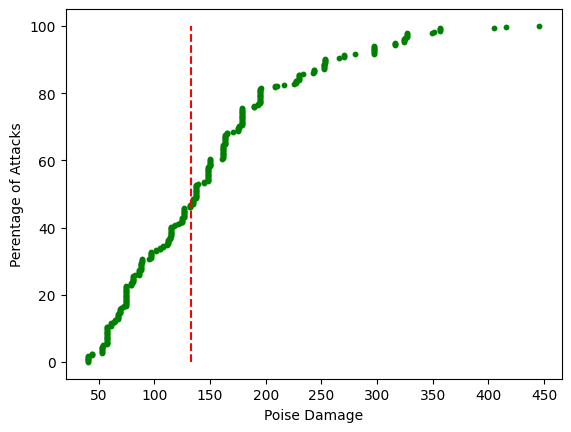

In [103]:
plt.scatter(PsePer,per, s=10, color='green')
plt.plot([133,133],[0,100], '--', color ='red')
plt.xlabel("Poise Damage")
plt.ylabel("Perentage of Attacks")

In [104]:
PsePerR1 = getpercentile(PseArrayR1,per)

Text(0, 0.5, 'Perentage of Attacks')

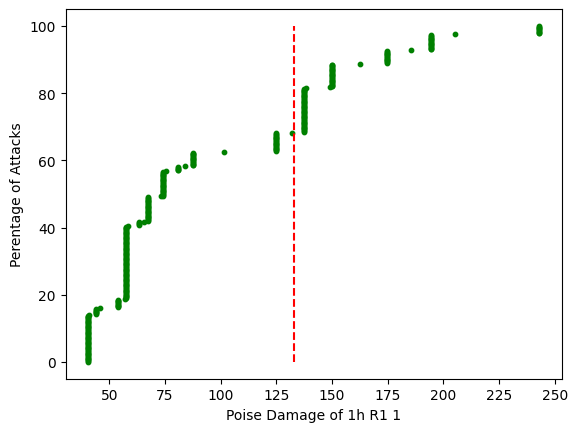

In [105]:
plt.scatter(PsePerR1,per, s=10, color='green')
plt.plot([133,133],[0,100], '--', color ='red')
plt.xlabel("Poise Damage of 1h R1 1")
plt.ylabel("Perentage of Attacks")

Text(0, 0.5, 'Perentage of Attacks')

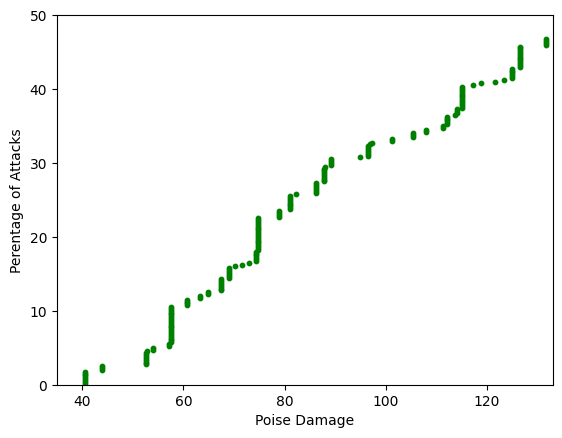

In [106]:
plt.scatter(PsePer,per, s=10, color='green')
plt.xlim(35,133)
plt.ylim(0,50)
plt.xlabel("Poise Damage")
plt.ylabel("Perentage of Attacks")

In [134]:
print(np.percentile(PseArray, 2))
print(np.percentile(PseArray, 3.5))
print(np.percentile(PseArray, 10))
print(np.percentile(PseArray, 14))
print(np.percentile(PseArray, 15))
print(np.percentile(PseArray, 22))
print(np.percentile(PseArray, 25))
print(np.percentile(PseArray, 27))
print(np.percentile(PseArray, 29))
print(np.percentile(PseArray, 30))

44.0
52.65
57.5
67.5
69.0
74.75
81.0
86.25
87.75
89.1
